# Housing Price Prediction using Machine Learning

## Objective
The goal of this project is to predict the median house value using demographic and geographic features from the California Housing dataset. The project demonstrates a complete data science workflow including data preprocessing, exploratory data analysis, feature engineering, and machine learning model comparison.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Load Dataset


In [2]:
df = pd.read_csv("../data/housing.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Inspection


In [3]:
df.shape


(20640, 10)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Handling Missing Values


In [7]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


## Exploratory Data Analysis

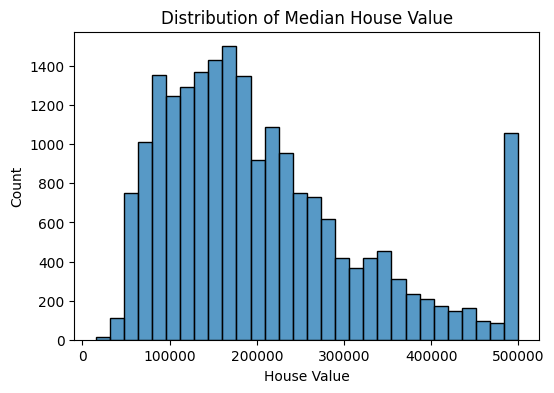

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['median_house_value'], bins=30)
plt.title("Distribution of Median House Value")
plt.xlabel("House Value")
plt.ylabel("Count")
plt.show()


## Median Income vs House Value

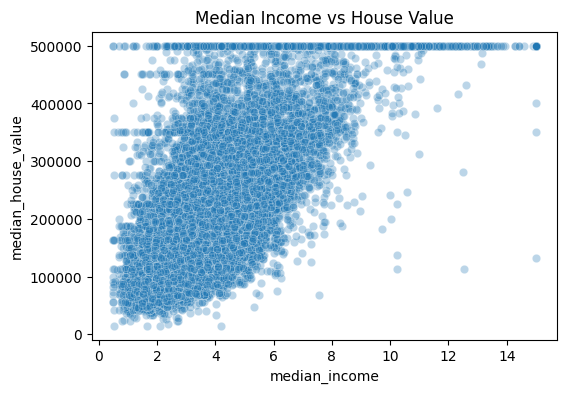

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df['median_income'],
    y=df['median_house_value'],
    alpha=0.3
)
plt.title("Median Income vs House Value")
plt.show()


## House Prices by Ocean Proximity

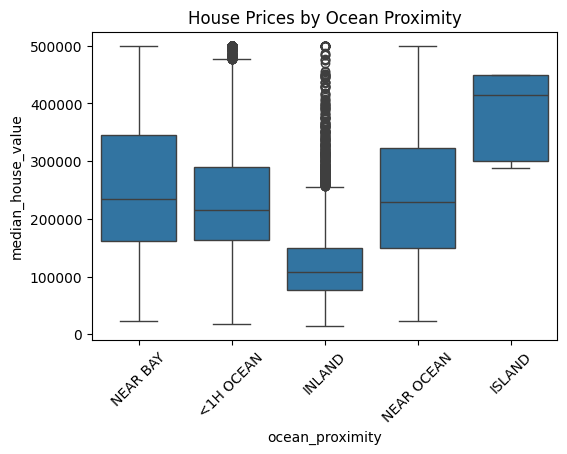

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x=df['ocean_proximity'],
    y=df['median_house_value']
)
plt.xticks(rotation=45)
plt.title("House Prices by Ocean Proximity")
plt.show()


## Correlation Heatmap

C:\Users\PRIYANK\AppData\Local\Temp\ipykernel_2176\3108070060.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm")


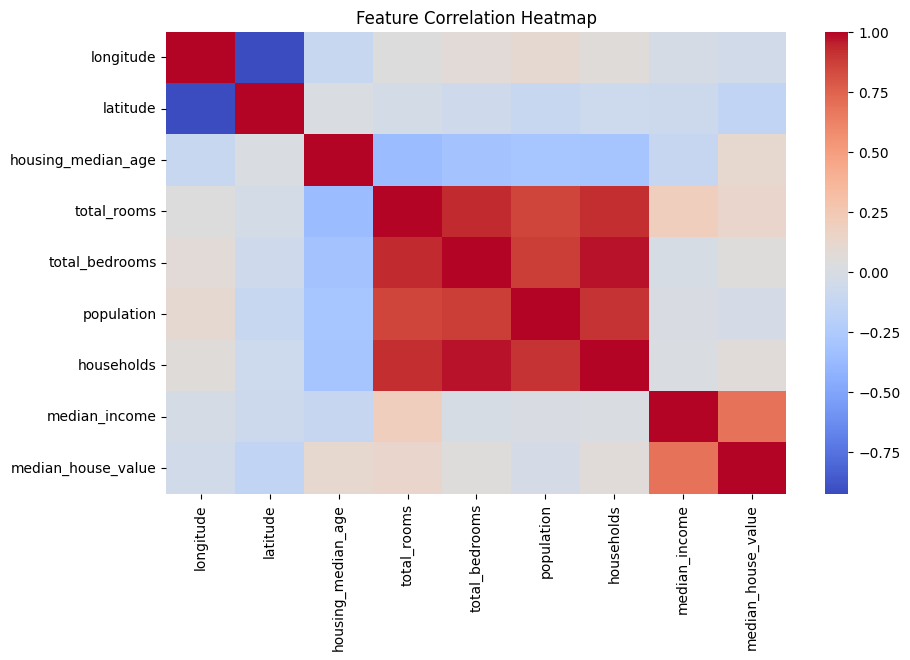

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## Feature Engineering

In [12]:
df = pd.get_dummies(df, drop_first=True)


In [13]:
df.dtypes


longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_INLAND          uint8
ocean_proximity_ISLAND          uint8
ocean_proximity_NEAR BAY        uint8
ocean_proximity_NEAR OCEAN      uint8
dtype: object

## Train-Test Split

In [14]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Linear Regression Model

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 4908476721.156621
R2 Score: 0.6254240620553602


## Random Forest Regressor


In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: 0.8164888965922015


## Conclusion

- Random Forest significantly outperformed Linear Regression
- Median income is the strongest predictor
- Location and ocean proximity strongly influence housing prices
- Ensemble models are better suited for this dataset